In [915]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from sklearn import preprocessing
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [916]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\hotels.csv')
df.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [918]:
df.shape

(386803, 17)

In [919]:
df['hotel_name'].nunique() # Количество уникальных названий 

1492

In [920]:
df['review_date'] = pd.to_datetime(df['review_date'])
print(f'Самый первый отзыв был оставлен в {df['review_date'].min()}')
print(f'Самый свежий отзыв был оставлен в {df['review_date'].max()}')

Самый первый отзыв был оставлен в 2015-08-04 00:00:00
Самый свежий отзыв был оставлен в 2017-08-03 00:00:00


# 1. Первичная обработка данных (пропущенные значения, выбросы, дубликаты).

In [921]:
# Посмотрим на дубликаты
df.duplicated().sum()

307

In [922]:
# Удаляем дубликаты
df.drop_duplicates()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,2017-04-19,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,10,10,8.8,"[' Leisure trip ', ' Group ', ' Club Double or...",106 day,51.494028,-0.191050
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2017-02-13,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,9.2,"[' Leisure trip ', ' Couple ', ' Standard Doub...",171 day,48.192379,16.399451
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2016-02-07,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,8.3,"[' Business trip ', ' Solo traveler ', ' Singl...",543 day,51.520795,-0.131084
386801,31 Great Cumberland Place Westminster Borough ...,365,2017-05-21,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066


In [923]:
df.info() 
# Пропущенные значения есть только в столбцах lat и lng, на данный момент мы их пропускаем, работать с ними будем позже.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [924]:
# Изменим типы данных
df['additional_number_of_scoring'] = df['additional_number_of_scoring'].astype('int16')
df['average_score'] = df['average_score'].astype('float16')
df['review_total_negative_word_counts'] = df['review_total_negative_word_counts'].astype('int16')
df['review_total_positive_word_counts'] = df['review_total_positive_word_counts'].astype('int16')
df['total_number_of_reviews'] = df['total_number_of_reviews'].astype('int16')
df['total_number_of_reviews_reviewer_has_given'] = df['total_number_of_reviews_reviewer_has_given'].astype('int16')
df['reviewer_score'] = df['reviewer_score'].astype('float16')
df['lat'] = df['lat'].astype('float32')
df['lng'] = df['lng'].astype('float32')


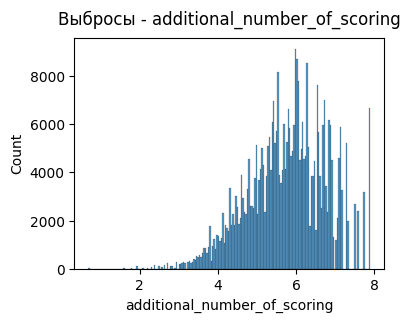

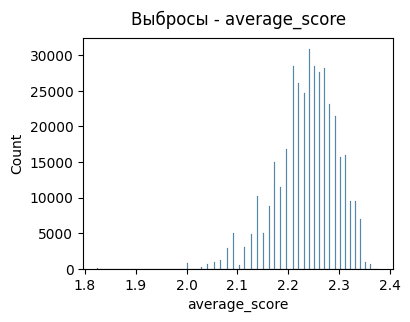

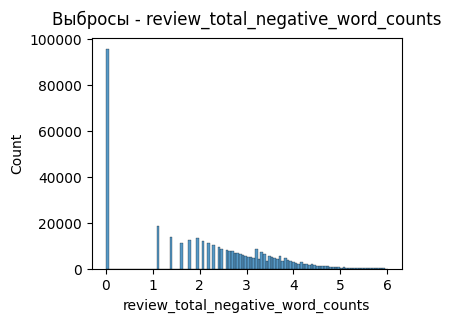

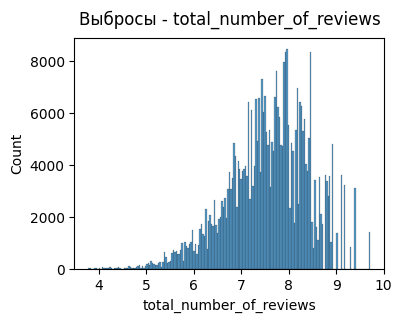

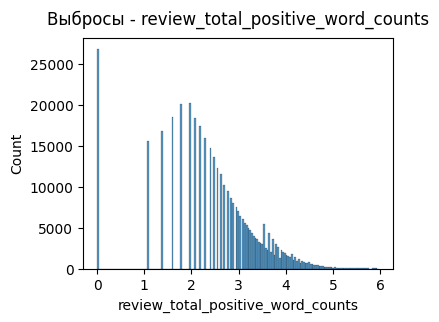

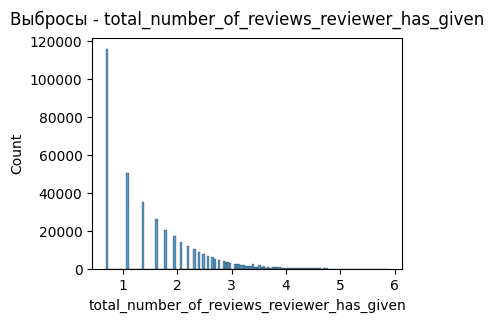

In [925]:
# Проверим выбросы, используя логарифмическую шкалу
lst = ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']

for i in lst:
    plt.figure(figsize=(4, 3))
    sns.histplot(np.log(df[i] + 1))
    plt.title(f'Выбросы - {i}', pad=10)

Давайте удалим выбросы с помощью метода Тьюки у следующих признаков : additional_number_of_scoring,
average_score, total_number_of_reviews.


In [926]:
def outliers_iqr_mod(data, feature, log_scale=False, left=3, right=3):
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)

    if log_scale:
      x = np.log(data[feature])
    else:
      x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quantile_3 - quantile_1
    lower_bound = quantile_1 - (iqr * left)
    upper_bound = quantile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(df, 'additional_number_of_scoring', log_scale=True, left=2.5, right=2.5)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 53
Результирующее число записей: 386750


In [927]:
_, df = outliers_iqr_mod(df, 'total_number_of_reviews', log_scale=True, left=2.5, right=2.5)
_, df = outliers_iqr_mod(df, 'average_score', log_scale=True, left=2.5, right=2.5)
_, df = outliers_iqr_mod(df, 'additional_number_of_scoring', log_scale=True, left=2.5, right=2.5)
df.shape

(385651, 17)

Давайте дополнительно удалим из столбца total_number_of_reviews значения больше 15000. Таких наблюдений немного. 
В additional_number_of_scoring тоже есть выбросы, одна их, на мой взгляд, следует оставить, так как частота таких оценок достаточно велика, чтобы их считать выбросами.

Также удалим наблюдения, где в review_total_negative_word_counts > 120

Удалим наблюдения, где review_total_positive_word_counts > 100

Удалим наблюдения, где total_number_of_reviews_reviewer_has_given > 50

In [928]:
print(f"Количество наблюдений, где review_total_negative_word_counts > 120: {df[df['review_total_negative_word_counts'] > 120].shape[0]}")
print(f"Количество наблюдений, где review_total_positive_word_counts > 100: {df[df['review_total_positive_word_counts'] > 100].shape[0]}")
print(f"Количество наблюдений, где total_number_of_reviews_reviewer_has_given > 50: {df[df['total_number_of_reviews_reviewer_has_given'] > 50].shape[0]}")

Количество наблюдений, где review_total_negative_word_counts > 120: 5696
Количество наблюдений, где review_total_positive_word_counts > 100: 4158
Количество наблюдений, где total_number_of_reviews_reviewer_has_given > 50: 4267


In [929]:
df = df[df['total_number_of_reviews'] < 15_000]
df = df[df['review_total_negative_word_counts'] < 120]
df = df[df['review_total_positive_word_counts'] < 100]
df = df[df['total_number_of_reviews_reviewer_has_given'] < 50]
print(f'Количество наблюдений после удаления выбросов: {df.shape[0]}')

Количество наблюдений после удаления выбросов: 370092


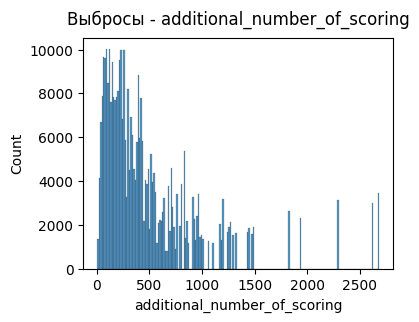

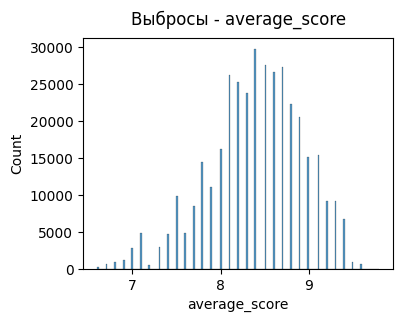

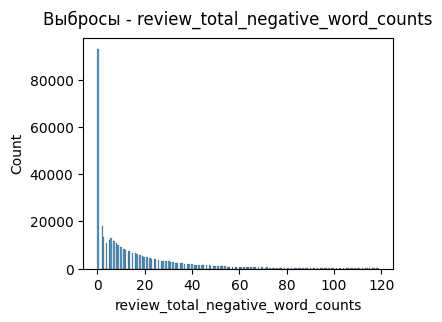

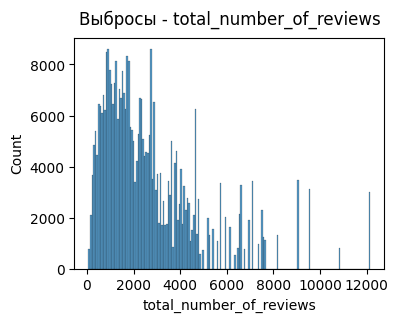

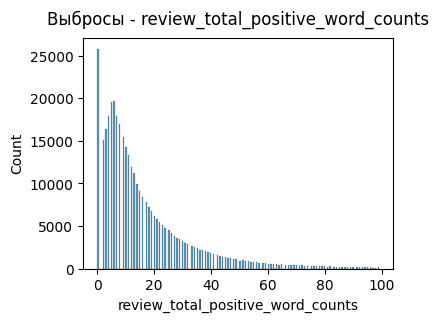

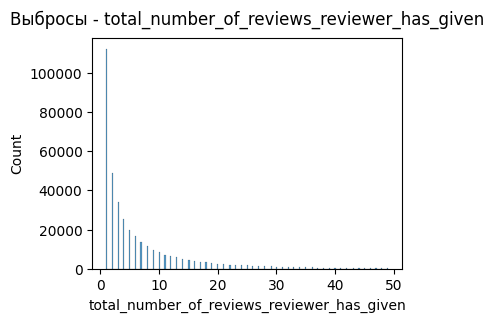

In [930]:
# Проверим выбросы ещё раз
lst = ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']


for i in lst:
    plt.figure(figsize=(4, 3))
    sns.histplot((df[i]))
    plt.title(f'Выбросы - {i}', pad=10)

# 2. Проектирование новых признаков

**1. Получим информацию о стране с помощью столбца hotel_address**

In [931]:
print(f'Количество уникальных адресов: {df['hotel_address'].nunique()}')

Количество уникальных адресов: 1472


In [932]:
# Напишем функцию, которая возвращает последние 2 слова
def country_return(x):
    lst = x.split()
    last_3_words = ' '.join(lst[-2:])
    return last_3_words

# Используем функцию для создания нового столбца
df['hotels_country'] = df['hotel_address'].apply(country_return)
print(f'Уникальные значения: {df['hotels_country'].unique()}')
print()
print('Процентное соотношение стран в датафрейме:')
df['hotels_country'].value_counts(True)

Уникальные значения: ['United Kingdom' 'Paris France' 'Amsterdam Netherlands' 'Milan Italy'
 'Barcelona Spain' 'Vienna Austria']

Процентное соотношение стран в датафрейме:


hotels_country
United Kingdom           0.512473
Barcelona Spain          0.117122
Paris France             0.115879
Amsterdam Netherlands    0.110897
Vienna Austria           0.075273
Milan Italy              0.068356
Name: proportion, dtype: float64

In [933]:
df.drop(['hotel_address'], axis=1, inplace=True)

**2. Обработаем столбец hotel_name**

In [934]:
print(f'Количество уникальных значений: {df['hotel_name'].nunique()}')
df['hotel_name'].value_counts(True) * 100

Количество уникальных значений: 1471


hotel_name
Britannia International Hotel Canary Wharf           0.934632
Strand Palace Hotel                                  0.846546
Park Plaza Westminster Bridge London                 0.806286
Copthorne Tara Hotel London Kensington               0.709824
DoubleTree by Hilton Hotel London Tower of London    0.625520
                                                       ...   
Hotel Eitlj rg                                       0.001891
Ibis Styles Milano Palmanova                         0.001891
Hotel Wagner                                         0.001621
Hotel Gallitzinberg                                  0.001351
Mercure Paris Porte d Orleans                        0.001081
Name: proportion, Length: 1471, dtype: float64

In [935]:
df.drop(['hotel_name'], axis=1, inplace=True)
# Уникальных значений в данном столбце очень много, 
# каких-либо отелей сильно выделяющихся на фоне остальных нет, поэтому удаляем признак, как неинформативный.

**3. Посмотрим на признак reviewer_nationality**

In [936]:
print(f'Количество уникальных значений : {df['reviewer_nationality'].nunique()}')
value_counts_data = df['reviewer_nationality'].value_counts(True) * 100
value_counts_data.head(20)

Количество уникальных значений : 224


reviewer_nationality
United Kingdom               48.014818
United States of America      6.825330
Australia                     4.209494
Ireland                       2.895496
United Arab Emirates          1.973293
Saudi Arabia                  1.756050
Netherlands                   1.666342
Switzerland                   1.613653
Canada                        1.540428
Germany                       1.484226
France                        1.413432
Israel                        1.269414
Belgium                       1.140527
Italy                         1.122424
Turkey                        1.056494
Kuwait                        0.969218
Spain                         0.909233
Romania                       0.853842
South Africa                  0.753867
Russia                        0.725765
Name: proportion, dtype: float64

In [937]:
filtr_value_counts = value_counts_data[value_counts_data > 0.01] # Посмотрим на список стран, доля которых больше 0.01%
print(filtr_value_counts.index.unique().to_list())


[' United Kingdom ', ' United States of America ', ' Australia ', ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ', ' Netherlands ', ' Switzerland ', ' Canada ', ' Germany ', ' France ', ' Israel ', ' Belgium ', ' Italy ', ' Turkey ', ' Kuwait ', ' Spain ', ' Romania ', ' South Africa ', ' Russia ', ' India ', ' China ', ' Sweden ', ' Greece ', ' New Zealand ', ' Singapore ', ' Hong Kong ', ' Qatar ', ' Poland ', ' Egypt ', ' Norway ', ' Austria ', ' Lebanon ', ' Czech Republic ', ' Hungary ', ' Malaysia ', ' Thailand ', ' Brazil ', ' Finland ', ' Portugal ', ' Denmark ', ' Malta ', ' Bahrain ', ' Indonesia ', ' Oman ', ' Croatia ', ' Luxembourg ', ' Cyprus ', ' Bulgaria ', ' Japan ', ' Iran ', ' Serbia ', ' South Korea ', ' Philippines ', ' Ukraine ', ' Nigeria ', ' Iceland ', ' Taiwan ', ' Pakistan ', ' Jersey ', ' Slovakia ', ' Jordan ', ' Slovenia ', ' Lithuania ', ' Estonia ', ' Latvia ', ' Mexico ', ' Guernsey ', ' ', ' Argentina ', ' Isle of Man ', ' Gibraltar ', ' Chile 

In [938]:
# напишем функцию, которая определеляет регион мира по стране
df['reviewer_nationality'] = df['reviewer_nationality'].str.strip()
def geo_func(country): 
    geographic_regions = {
    # Выделенные страны
    "United States": ["United States of America"],
    "United Kingdom": ["United Kingdom"], 
    "Australia": ["Australia"],
    
    "Europe": [
        "Netherlands", "Switzerland", "Germany", "France", 
        "Italy", "Belgium", "Spain", "Romania", "Russia", 
        "Sweden", "Greece", "Poland", "Austria", "Norway", 
        "Czech Republic", "Hungary", "Portugal", "Finland", 
        "Denmark", "Malta", "Luxembourg", "Croatia", "Bulgaria", 
        "Cyprus", "Japan", "Serbia", "Ukraine", "Iceland", 
        "Slovakia", "Slovenia", "Lithuania", "Estonia", "Latvia", 
        "Albania", "Azerbaijan", "Georgia", "Macedonia", 
        "Kazakhstan", "Monaco", "Bosnia and Herzegovina", 
        "Montenegro", "Belarus", "Moldova", "Andorra", "Kosovo", "Ireland"
    ],
    
    # Ближний Восток
    "Middle East": [
        "United Arab Emirates", "Saudi Arabia", "Israel", 
        "Turkey", "Kuwait", "Qatar", "Lebanon", "Bahrain", 
        "Oman", "Jordan", "Iran", "Iraq", "Egypt", "Palestinian Territory"
    ],
    
    # Азия
    "Asia": [
        "China", "India", "Singapore", "Hong Kong", 
        "Malaysia", "Thailand", "Indonesia", "South Korea", 
        "Philippines", "Taiwan", "Pakistan", "Sri Lanka", 
        "Bangladesh", "Vietnam", "Brunei", "Macau", 
        "Kazakhstan", "Armenia", "Abkhazia Georgia"
    ]
}
    
    for key, value in geographic_regions.items():
        if country in value:
            return key 
    return "Other"
        
df['reviewer_geo_region'] = df['reviewer_nationality'].apply(geo_func) # Применяем функцию

In [939]:
df['reviewer_geo_region'].value_counts(True) * 100 # Получили меньшее количество групп

reviewer_geo_region
United Kingdom    48.014818
Europe            21.808091
Middle East        9.477643
United States      6.825330
Other              5.111702
Asia               4.552922
Australia          4.209494
Name: proportion, dtype: float64

In [940]:
df.drop(['reviewer_nationality'], axis=1, inplace=True) # Удаляем столбец

Мы избавились от огромного количества стран, получив разбивку на основные регионы мира.
Визуализация подсказывает, что регион влияет на балл отеля.

**4. Признак lat и  lng**

In [941]:
df['lat'].value_counts(True) * 100 # Без округления мы имеем около 1500 уникальных значений.

lat
51.501911    0.940608
51.511101    0.851958
51.500961    0.811441
51.499046    0.714361
51.510841    0.685537
               ...   
48.151367    0.001904
45.504524    0.001904
45.468494    0.001632
48.214508    0.001360
48.817806    0.001088
Name: proportion, Length: 1433, dtype: float64

In [942]:
df['lat_round'] = df['lat'].round() # Округляем 
# Посмотрим на пропорцию страны отеля и широты
data_lat_group = df.groupby('hotels_country')['lat_round'].value_counts(True).reset_index() 

# Заполним пропуски исходя из этой таблицы
max_prop = data_lat_group.loc[data_lat_group.groupby('hotels_country')['proportion'].idxmax()]
country_lat_dict = dict(zip(max_prop['hotels_country'], max_prop['lat_round'])) # Создаём словарь

df['lat_round'] = df['lat_round'].fillna(df['hotels_country'].map(country_lat_dict)) # Заполняем пропуски

In [943]:
# Аналогично поступим и с долготой

In [944]:
df['lng_round'] = df['lng'].round() # Округляем 
# Посмотрим на пропорцию страны отеля и широты
data_lng_group = df.groupby('hotels_country')['lng_round'].value_counts(True).reset_index() 
data_lng_group

,hotels_country,lng_round,proportion
0,Amsterdam Netherlands,5.0,1.0
1,Barcelona Spain,2.0,1.0
2,Milan Italy,9.0,1.0
3,Paris France,2.0,1.0
4,United Kingdom,-0.0,1.0
5,Vienna Austria,16.0,1.0


In [945]:
max_prop = data_lng_group.loc[data_lng_group.groupby('hotels_country')['proportion'].idxmax()]
country_lng_dict = dict(zip(max_prop['hotels_country'], max_prop['lng_round'])) # Создаём словарь

df['lng_round'] = df['lng_round'].fillna(df['hotels_country'].map(country_lng_dict)) # Заполняем пропуски

In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370092 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                370092 non-null  int16         
 1   review_date                                 370092 non-null  datetime64[ns]
 2   average_score                               370092 non-null  float16       
 3   negative_review                             370092 non-null  object        
 4   review_total_negative_word_counts           370092 non-null  int16         
 5   total_number_of_reviews                     370092 non-null  int16         
 6   positive_review                             370092 non-null  object        
 7   review_total_positive_word_counts           370092 non-null  int16         
 8   total_number_of_reviews_reviewer_has_given  370092 non-null  int16         
 9 

In [947]:
df['lat_round'] = df['lat_round'].astype('int8') # Меняем тип данных, чтобы уменьшить объём таблицы
df['lng_round'] = df['lng_round'].astype('int8') # Меняем тип данных, чтобы уменьшить объём таблицы

In [948]:
df.drop(['lat', 'lng'], axis=1, inplace=True)

**5. Признаки negative_review и positive_review**

In [949]:
# Рассмотрим признак negative_review
print(f'Количество уникальных значений столбца negative_review: {df['negative_review'].nunique()}')

# Убираем пробелы, скрытые пропуски, меняем регистр
df['negative_review'] = df['negative_review'].str.strip()
df['negative_review'] = df['negative_review'].apply(lambda x: 'None' if not(x) else x)
df['negative_review'] = df['negative_review'].str.lower()

neg_rev = df['negative_review'].value_counts(True) * 100
neg_rev_filt = neg_rev[neg_rev > 0.05] # Рассмотрим только те значения, у которых доля больше 0.05%
neg_rev_filt

Количество уникальных значений столбца negative_review: 235881


negative_review
no negative               25.224809
nothing                    4.172206
none                       0.450158
n a                        0.369097
nothing really             0.129427
small room                 0.112945
all good                   0.111324
breakfast                  0.104839
location                   0.102137
no complaints              0.101056
everything                 0.086465
nothing at all             0.084033
nothing to dislike         0.075387
price                      0.069712
nil                        0.069172
small rooms                0.061066
na                         0.054851
everything was perfect     0.052960
Name: proportion, dtype: float64

Изучив признак negative_review можно заметить, что многие рецензенты написали, что не видят ничего плохого в отеле, в котором они проживали. Однако одна и та же мысль у каждого написана по-разному (No Negative, Nothing, nothing, None и пр.), поэтому нам необходимо вычленить все отзывы, в которых рецензенты не написали ничего негативного, заменив эти значения на 0, негативные отзывы заменим на -1. 

In [950]:
# В списке представлены основные (не все) неотрицательные отзывы, которые мы будем кодировать 0.
list_not_negative = ['no negative', 'nothing', 'n a', 'none', 'nothing really', 'all good', 'no complaints', 'nothing at all',
                'nothing to dislike', 'nil', 'na', 'everything was perfect', 'absolutely nothing', 'can t think of anything',
                'everything was great', 'nothing to complain about', 'no', 'everything was good', 'nothing all good', 'liked everything',
                'i liked everything', 'non', 'not much', 'nothing everything was perfect', 'everything was fine', 'all was good']  



df['negative_review_code'] = df['negative_review'].apply(lambda x: 0 if x in list_not_negative else -1)
df['negative_review_code'].value_counts(True)

negative_review_code
-1    0.686305
 0    0.313695
Name: proportion, dtype: float64

In [951]:
# Аналогично поступим и с positive_review
print(f'Количество уникальных значений столбца positive_review: {df['positive_review'].nunique()}')

# Убираем пробелы, скрытые пропуски, меняем регистр
df['positive_review'] = df['positive_review'].str.strip()
df['positive_review'] = df['positive_review'].apply(lambda x: 'None' if not(x) else x)
df['positive_review'] = df['positive_review'].str.lower()

df['positive_review'].value_counts(True).head(30) * 100

Количество уникальных значений столбца positive_review: 297580


positive_review
no positive                   6.983939
location                      2.321855
everything                    0.650109
great location                0.338564
nothing                       0.320731
the location                  0.307761
good location                 0.292090
breakfast                     0.151854
friendly staff                0.144018
excellent location            0.126725
staff                         0.112404
location and staff            0.089707
location staff                0.083223
location location location    0.066740
location was great            0.064579
everything was perfect        0.064038
location was good             0.061336
comfy bed                     0.059985
good breakfast                0.057013
perfect location              0.055932
the staff                     0.054581
location is great             0.052419
all                           0.048637
location is good              0.048637
clean                         0.047556
very frie

Признак positive_review имеет как положительные отзывы, так и нейтральные. Сохраним логику преобразования данных от negative_review. Отзывы положительные будем кодировать 1, а нейтральные или отрицательные - 0. Создадим список и напишем туда основные неположительные комментарии.

In [952]:
list_not_positive = ['no positive', 'nothing', 'none'] # Нейтральных и негативных отзывов в данном столбце существенно меньше, чем в предыдущем.
df['positive_review_code'] = df['positive_review'].apply(lambda x: 0 if x in list_not_positive else 1)
df['positive_review_code'].value_counts(True).head()

positive_review_code
1    0.926543
0    0.073457
Name: proportion, dtype: float64

In [953]:
df['negative_review_code'] = df['negative_review_code'].astype('int8') # Изменяем тип данных
df['positive_review_code'] = df['positive_review_code'].astype('int8')

Создадим новые признаки: посчитаем количество слов в негативных и положительных отзывах

In [954]:
df['negative_review_len'] = df['negative_review'].apply(lambda x: len(x.split())) # считаем количество слов
df['positive_review_len'] = df['positive_review'].apply(lambda x: len(x.split()))

In [955]:
df[['negative_review_len', 'positive_review_len']].describe()

,negative_review_len,positive_review_len
count,370092.000000,370092.000000
mean,15.229637,14.953579
std,19.532013,15.910362
min,1.000000,1.000000
25%,2.000000,4.000000
50%,7.000000,9.000000
75%,21.000000,20.000000
max,118.000000,98.000000


In [956]:
df['negative_review_len'] = df['negative_review_len'].astype('int8') # Изменяем тип данных
df['positive_review_len'] = df['positive_review_len'].astype('int8')

In [957]:
# Разделим каждую выборку нового признака на 5 частей по квантилям
df['negative_review_len_q'] = pd.qcut(df['negative_review_len'], q=5, labels=[1, 2, 3, 4, 5])
df['positive_review_len_q'] = pd.qcut(df['positive_review_len'], q=5, labels=[1, 2, 3, 4, 5])
df['negative_review_code'] = df['negative_review_code'].astype('int8')
df['positive_review_code'] = df['positive_review_code'].astype('int8')

In [958]:
# Удаляем ненужные столбцы
df.drop(['positive_review', 'negative_review'], axis=1, inplace=True) 

После преобразований мы получилм 4 новых закодированных столбца positive_review_code и negative_review_code, positive_review_len_q и negative_review_len_q

**6. Рассмотрим признак tags**

Расскроем все списки и посчитаем количество самых употребляемых тегов. Выберем топ-20 и создадим из них список. Далее с помощью цикла посмотрим какое количество самых популярных тегов есть в отзыве. В итоге мы получим числовой столбец, который показывает количество наиболее популярных тегов в отзыве. 

Кроме того, создадим столбец, который считает количество тегов в каждом отзыве.

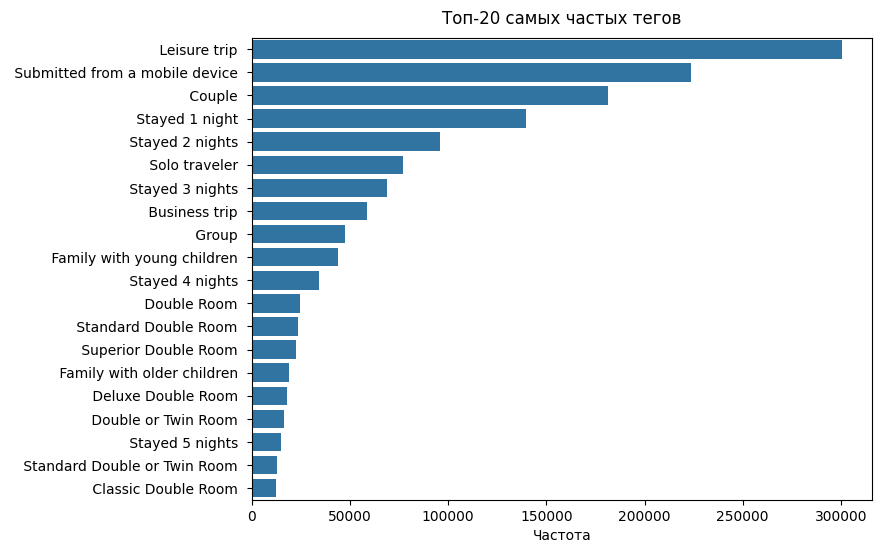

In [959]:
import ast # Для преобразования списка в объект list
df['tags'] = df['tags'].apply(ast.literal_eval)

# Посчитаем с помощью Counter самые популярные теги
from collections import Counter
all_tags = [tag for sublist in df['tags'] for tag in sublist]
tags_counts = Counter(all_tags)
top_20 = tags_counts.most_common(20)
tags, count = zip(*top_20)

plt.figure(figsize=(8, 6))
sns.barplot(x=count, y=tags)
plt.xlabel('Частота')
plt.title('Топ-20 самых частых тегов', pad=10);

In [960]:
l = []
for i in df['tags']: # Получаем список
    count=0
    for tag in i: # Проходимся по элементам списка
        if tag in tags: # Если элемент есть в топе-20 самых популярных, то +1
            count += 1
    l.append(count)
    
df['count_most_pop_tags'] = l
df['count_most_pop_tags'] = df['count_most_pop_tags'].astype('int8')
df['tags_len'] = df['tags'].apply(lambda x: len(x))
df.drop('tags', axis=1, inplace=True)

In [961]:
df

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,...,lat_round,lng_round,negative_review_code,positive_review_code,negative_review_len,positive_review_len,negative_review_len_q,positive_review_len_q,count_most_pop_tags,tags_len
0,581,2016-02-19,8.398438,3,1994,4,7,10.000000,531 day,United Kingdom,...,52,0,-1,1,1,3,1,1,4,5
1,299,2017-01-12,8.296875,3,1361,2,14,6.300781,203 day,United Kingdom,...,52,0,-1,1,2,1,1,1,4,4
2,32,2016-10-18,8.898438,6,406,0,14,7.500000,289 day,Paris France,...,49,2,-1,0,4,2,2,1,4,5
3,34,2015-09-22,7.500000,0,607,11,8,10.000000,681 day,Paris France,...,49,2,0,1,2,9,1,3,3,4
4,914,2016-03-05,8.500000,4,7586,20,10,9.601562,516 day,Amsterdam Netherlands,...,52,5,-1,1,2,18,1,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017-04-19,9.000000,0,617,10,10,8.796875,106 day,United Kingdom,...,51,0,0,1,2,8,1,3,4,5
386799,272,2017-02-13,8.398438,0,3224,93,1,9.203125,171 day,Vienna Austria,...,48,16,0,1,2,91,1,5,5,5
386800,457,2016-02-07,6.800781,12,2751,9,21,8.296875,543 day,United Kingdom,...,52,0,-1,1,10,8,3,3,3,4
386801,365,2017-05-21,8.101562,0,1567,6,28,9.203125,74 days,United Kingdom,...,52,0,0,1,2,5,1,2,4,4


In [962]:
df['tags_len'].value_counts(True) * 100

tags_len
5    58.487619
4    40.306464
3     1.043795
6     0.144559
2     0.016212
1     0.001351
Name: proportion, dtype: float64

In [963]:
# Объединим группы 3, 6, 2, 1 в одну.
df['tags_len'] = df['tags_len'].apply(lambda x: 3 if x in [3, 6, 2 , 1] else x)
df['tags_len'].value_counts(True) * 100

tags_len
5    58.487619
4    40.306464
3     1.205916
Name: proportion, dtype: float64

In [964]:
df['tags_len'] = df['tags_len'].astype('int8')

**7. Рассмотрим признак additional_number_of_scoring**

In [965]:
df['additional_number_of_scoring_q'] = pd.qcut(df['additional_number_of_scoring'], q=5, labels=[1, 2, 3, 4, 5])
data_add = df.groupby('additional_number_of_scoring_q')['reviewer_score'].mean().reset_index()
data_add

,additional_number_of_scoring_q,reviewer_score
0,1,8.554835
1,2,8.478618
2,3,8.416764
3,4,8.363670
4,5,8.332778


**8. Рассмотрим признаки review_date и days_since_review**

In [966]:
df['review_date'].value_counts(True) * 100

review_date
2017-08-02    0.491499
2016-09-15    0.456373
2017-04-05    0.443673
2016-02-16    0.380176
2016-08-30    0.379635
                ...   
2017-04-04    0.038369
2015-11-27    0.038099
2017-04-03    0.037018
2017-04-01    0.031614
2017-04-02    0.028101
Name: proportion, Length: 731, dtype: float64

Выделяющихся дат не обнаружено, давайте создадим несколько новых столбцов с годом, месяцем, днём недели, числом.

In [967]:
df['review_date_year'] = df['review_date'].dt.year
df['review_date_month'] = df['review_date'].dt.month
df['review_date_days_of_week'] = df['review_date'].dt.day_of_week
df['review_date_days'] = df['review_date'].dt.day

In [968]:
# Попробуем создать ещё 1 признак новый признак, напротив каждой даты напишем ранг. 
# У самой далекой даты будет ранг 1, каждfя следующая на 1 больше
df['review_date_rank'] = df['review_date'].rank(method='dense')

In [969]:
# Рассмотрим признак days_since_review
df['days_since_review'].value_counts(True) * 100

days_since_review
1 days     0.491499
322 day    0.456373
120 day    0.443673
534 day    0.380176
338 day    0.379635
             ...   
121 day    0.038369
615 day    0.038099
122 day    0.037018
124 day    0.031614
123 day    0.028101
Name: proportion, Length: 731, dtype: float64

In [970]:
df['days_since_review'] = df['days_since_review'].apply(lambda x: int(x.split()[0])) # Преобразуем столбец
df.head()

,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,...,negative_review_len_q,positive_review_len_q,count_most_pop_tags,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days,review_date_rank
0,581,2016-02-19,8.398438,3,1994,4,7,10.000000,531,United Kingdom,...,1,1,4,5,4,2016,2,4,19,200.0
1,299,2017-01-12,8.296875,3,1361,2,14,6.300781,203,United Kingdom,...,1,1,4,4,3,2017,1,3,12,528.0
2,32,2016-10-18,8.898438,6,406,0,14,7.500000,289,Paris France,...,2,1,4,5,1,2016,10,1,18,442.0
3,34,2015-09-22,7.500000,0,607,11,8,10.000000,681,Paris France,...,1,3,3,4,1,2015,9,1,22,50.0
4,914,2016-03-05,8.500000,4,7586,20,10,9.601562,516,Amsterdam Netherlands,...,1,4,3,4,5,2016,3,5,5,215.0


In [971]:
df['days_since_review'] = df['days_since_review'].astype('int16')

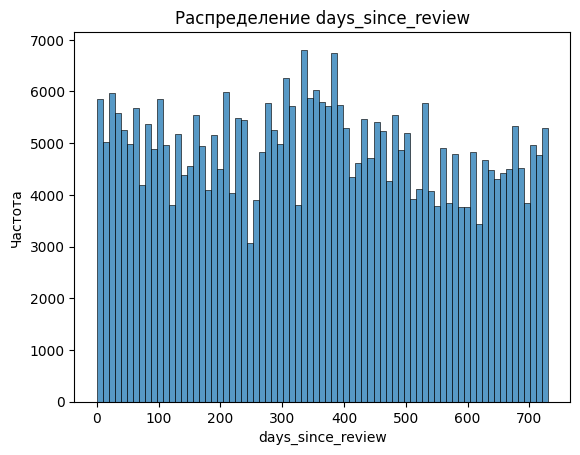

In [972]:
plt.title('Распределение days_since_review')
sns.histplot(df['days_since_review'])
plt.ylabel('Частота');

In [973]:
df.drop('review_date', axis=1, inplace=True)

In [974]:
df.duplicated().sum() # Проверим дубликаты

324

In [975]:
df.drop_duplicates(inplace=True)

# 3. Кодирование, нормализация и отбор признаков для модели

In [976]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369768 entries, 0 to 386802
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   additional_number_of_scoring                369768 non-null  int16   
 1   average_score                               369768 non-null  float16 
 2   review_total_negative_word_counts           369768 non-null  int16   
 3   total_number_of_reviews                     369768 non-null  int16   
 4   review_total_positive_word_counts           369768 non-null  int16   
 5   total_number_of_reviews_reviewer_has_given  369768 non-null  int16   
 6   reviewer_score                              369768 non-null  float16 
 7   days_since_review                           369768 non-null  int16   
 8   hotels_country                              369768 non-null  object  
 9   reviewer_geo_region                         369768 non-null  obj

In [977]:
dict_countries_code = {'United Kingdom' : 1, 'Milan Italy' : 2, 'Paris France' : 3, 
                       'Amsterdam Netherlands' : 4, 'Vienna Austria' : 5, 'Barcelona Spain' : 6}
df['hotels_country'] = df['hotels_country'].map(dict_countries_code) # Сделали кодировку

In [978]:
dict_geo = {'Middle East' : 1, 'Asia' : 2, 'Europe' : 3, 'Other' : 4, 'United Kingdom' : 5, 'Australia' : 6, 'United States' : 7}
df['reviewer_geo_region'] = df['reviewer_geo_region'].map(dict_geo) # Сделали кодировку

In [979]:
df['reviewer_geo_region'] = df['reviewer_geo_region'].astype('int8') # поменяли тип данных
df['hotels_country'] = df['hotels_country'].astype('int8')

In [980]:
df

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,reviewer_geo_region,...,negative_review_len_q,positive_review_len_q,count_most_pop_tags,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days,review_date_rank
0,581,8.398438,3,1994,4,7,10.000000,531,1,5,...,1,1,4,5,4,2016,2,4,19,200.0
1,299,8.296875,3,1361,2,14,6.300781,203,1,5,...,1,1,4,4,3,2017,1,3,12,528.0
2,32,8.898438,6,406,0,14,7.500000,289,3,2,...,2,1,4,5,1,2016,10,1,18,442.0
3,34,7.500000,0,607,11,8,10.000000,681,3,5,...,1,3,3,4,1,2015,9,1,22,50.0
4,914,8.500000,4,7586,20,10,9.601562,516,4,3,...,1,4,3,4,5,2016,3,5,5,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,9.000000,0,617,10,10,8.796875,106,1,3,...,1,3,4,5,1,2017,4,2,19,625.0
386799,272,8.398438,0,3224,93,1,9.203125,171,5,1,...,1,5,5,5,3,2017,2,0,13,560.0
386800,457,6.800781,12,2751,9,21,8.296875,543,1,3,...,3,3,3,4,4,2016,2,6,7,188.0
386801,365,8.101562,0,1567,6,28,9.203125,74,1,1,...,1,2,4,4,3,2017,5,6,21,657.0


C:\Users\user\AppData\Local\Temp\ipykernel_9388\3693081460.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 3))


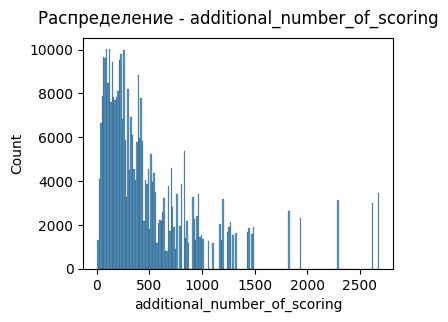

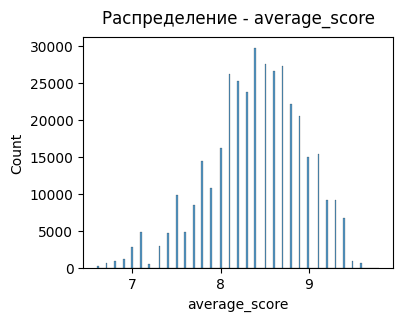

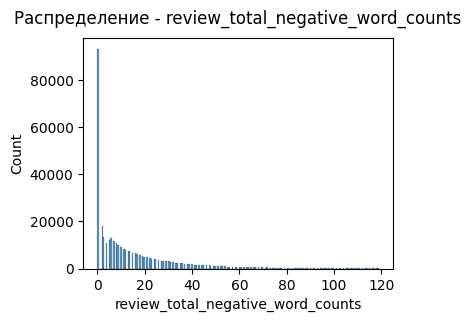

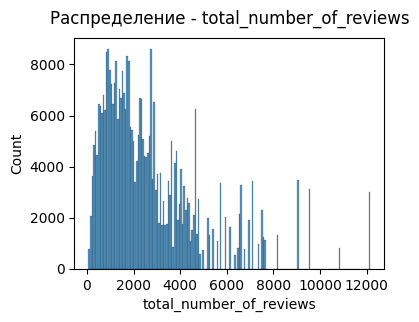

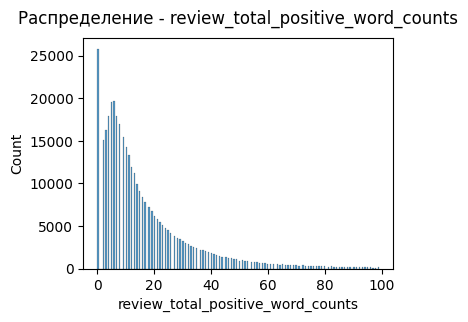

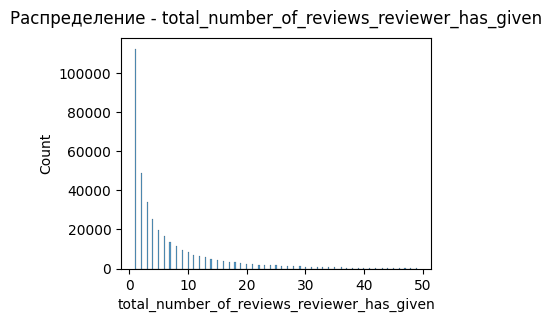

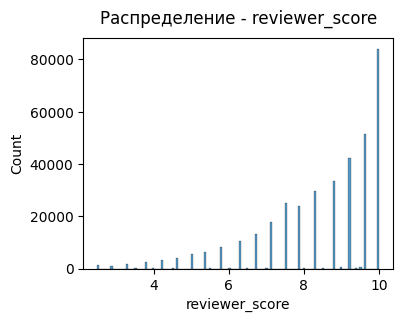

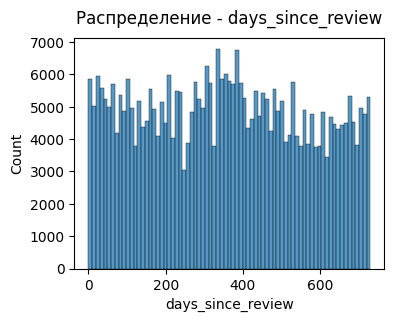

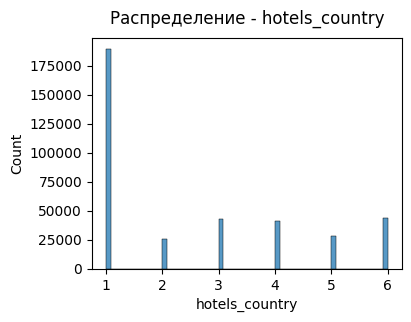

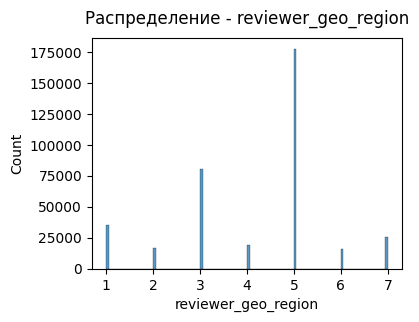

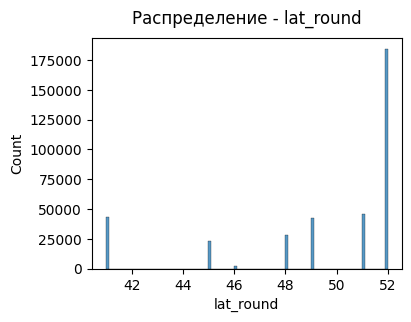

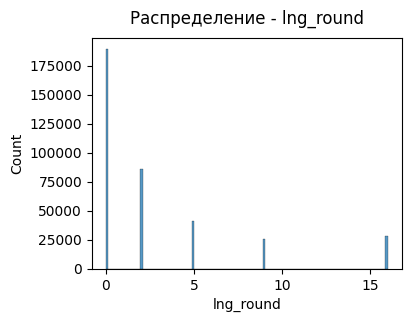

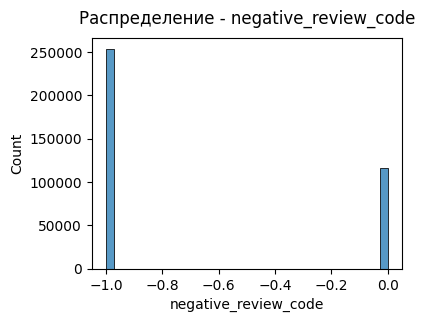

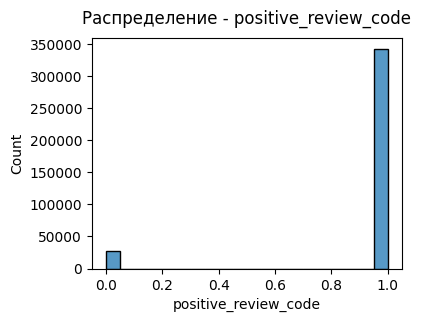

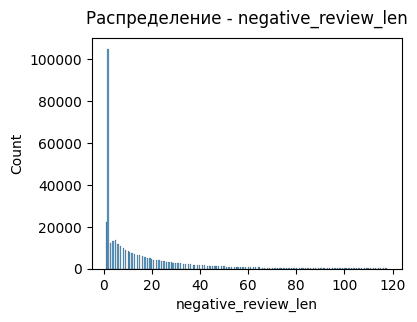

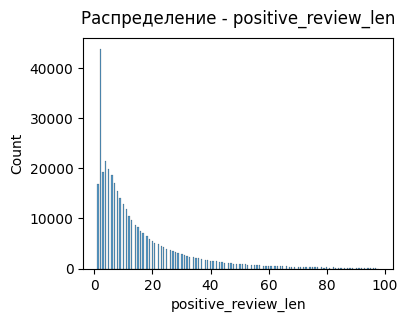

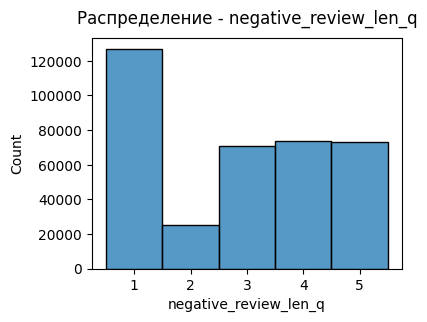

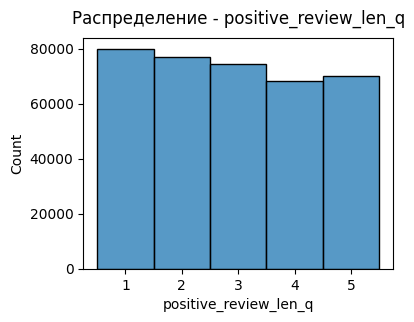

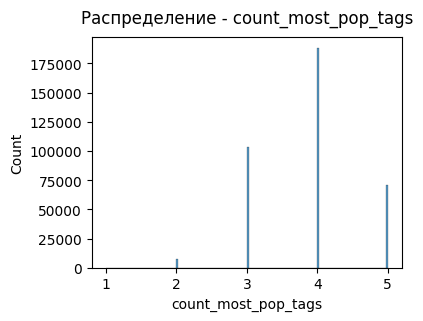

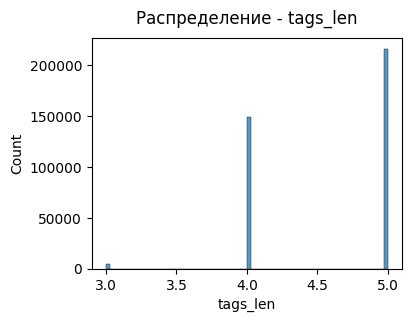

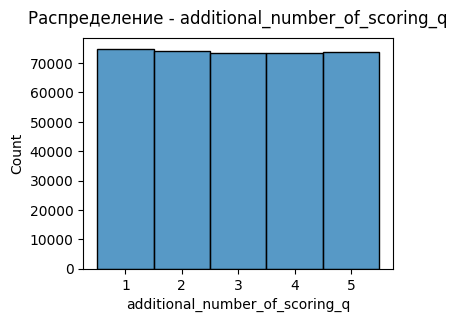

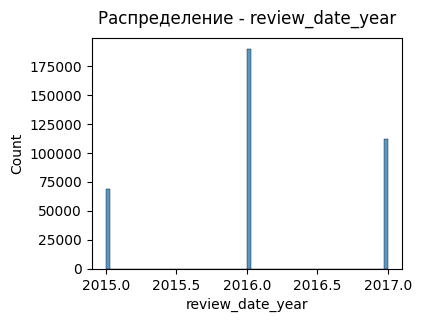

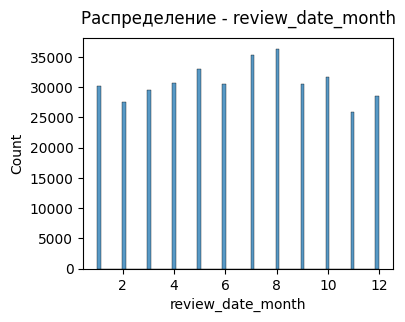

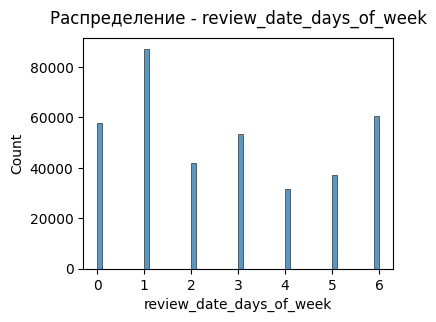

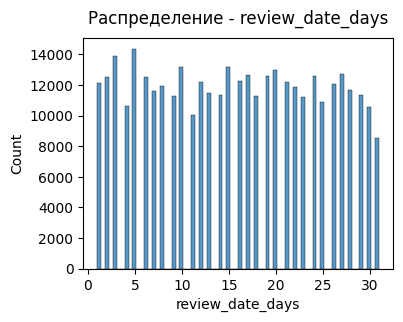

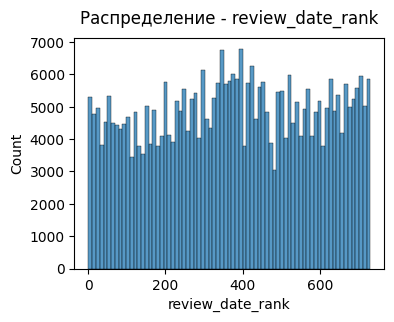

In [981]:
for i in df.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[i])
    plt.title(f'Распределение - {i}', pad=10)

Только график признака average_score похож на нормальное распределение, стандартизируем его, остальные столбцы, где разброс значений достаточно большой будет нормализировать

In [982]:
s_scaler = preprocessing.StandardScaler()
s_robust = preprocessing.RobustScaler()
df['average_score']= s_scaler.fit_transform(df[['average_score']])
df[['additional_number_of_scoring', 'total_number_of_reviews', 'days_since_review', 'review_date_rank']] = s_robust.fit_transform(
    df[['additional_number_of_scoring', 'total_number_of_reviews', 'days_since_review', 'review_date_rank']]
)

In [983]:
df

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,hotels_country,reviewer_geo_region,...,negative_review_len_q,positive_review_len_q,count_most_pop_tags,tags_len,additional_number_of_scoring_q,review_date_year,review_date_month,review_date_days_of_week,review_date_days,review_date_rank
0,0.486762,-0.008545,3,-0.055510,4,7,10.000000,0.504274,1,5,...,1,1,4,5,4,2016,2,4,19,-0.504274
1,-0.087576,-0.196899,3,-0.313878,2,14,6.300781,-0.430199,1,5,...,1,1,4,4,3,2017,1,3,12,0.430199
2,-0.631365,0.918457,6,-0.703673,0,14,7.500000,-0.185185,3,2,...,2,1,4,5,1,2016,10,1,18,0.185185
3,-0.627291,-1.673828,0,-0.621633,11,8,10.000000,0.931624,3,5,...,1,3,3,4,1,2015,9,1,22,-0.931624
4,1.164969,0.179688,4,2.226939,20,10,9.601562,0.461538,4,3,...,1,4,3,4,5,2016,3,5,5,-0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,-0.478615,1.107422,0,-0.617551,10,10,8.796875,-0.706553,1,3,...,1,3,4,5,1,2017,4,2,19,0.706553
386799,-0.142566,-0.008545,0,0.446531,93,1,9.203125,-0.521368,5,1,...,1,5,5,5,3,2017,2,0,13,0.521368
386800,0.234216,-2.970703,12,0.253469,9,21,8.296875,0.538462,1,3,...,3,3,3,4,4,2016,2,6,7,-0.538462
386801,0.046843,-0.559082,0,-0.229796,6,28,9.203125,-0.797721,1,1,...,1,2,4,4,3,2017,5,6,21,0.797721


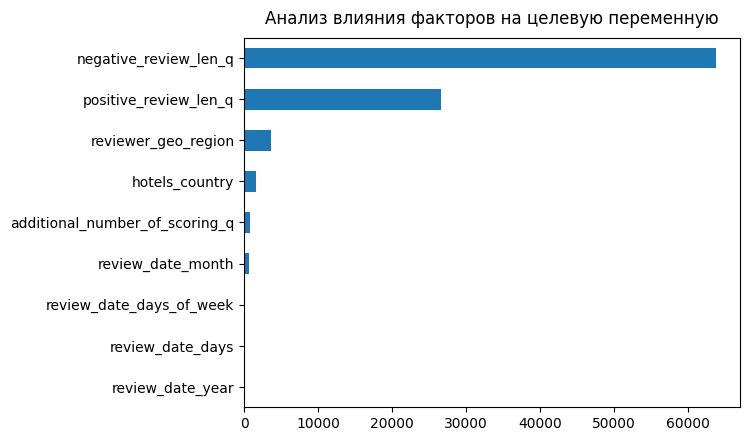

In [984]:
y = df['reviewer_score'].astype('int16') 
X = df.drop('reviewer_score', axis=1)

cat_cols = [      
    'hotels_country',         
    'reviewer_geo_region',    
    'negative_review_len_q',    
    'positive_review_len_q',   
    'additional_number_of_scoring_q', 
    'review_date_year',       
    'review_date_month',       
    'review_date_days_of_week', 
    'review_date_days'      
]
...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.title('Анализ влияния факторов на целевую переменную', pad=10);

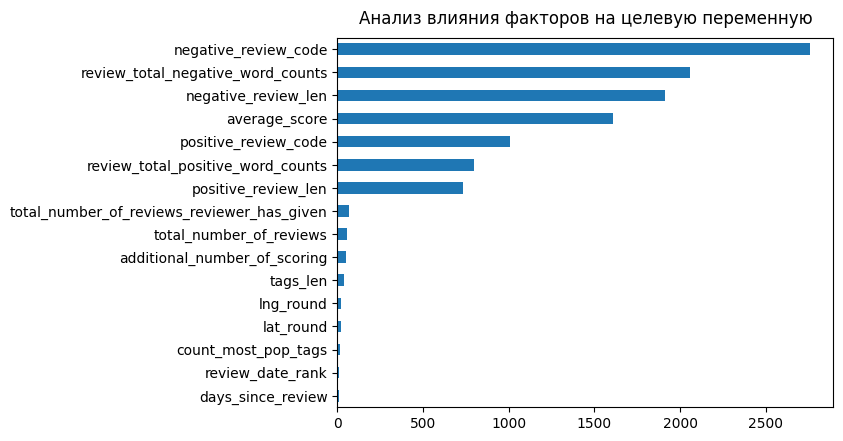

In [985]:
y=df['reviewer_score']
num_cols = ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews',
            'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'lat_round',
            'lng_round', 'negative_review_code', 'positive_review_code', 'negative_review_len', 'positive_review_len', 'count_most_pop_tags',
            'tags_len', 'review_date_rank']
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title('Анализ влияния факторов на целевую переменную', pad=10);

Построим сперва регрессию по всем факторам, которые у нас есть в модели и посмотрим на результат.

In [986]:
 # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
y = df['reviewer_score']
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13245100628423348


Значение MAPE = 0.132. Давайте теперь отберём факторы, которые влияют на целевую переменную сиьнее всего и построим новую регрессию.

In [987]:
df_new = df[['reviewer_score', 'negative_review_len_q', 'positive_review_len_q', 'reviewer_geo_region', 'negative_review_code', 'review_total_negative_word_counts', 'negative_review_len', 'average_score', 'positive_review_code', 'review_total_positive_word_counts', 'positive_review_len']]

In [988]:
df_new

,reviewer_score,negative_review_len_q,positive_review_len_q,reviewer_geo_region,negative_review_code,review_total_negative_word_counts,negative_review_len,average_score,positive_review_code,review_total_positive_word_counts,positive_review_len
0,10.000000,1,1,5,-1,3,1,-0.008545,1,4,3
1,6.300781,1,1,5,-1,3,2,-0.196899,1,2,1
2,7.500000,2,1,2,-1,6,4,0.918457,0,0,2
3,10.000000,1,3,5,0,0,2,-1.673828,1,11,9
4,9.601562,1,4,3,-1,4,2,0.179688,1,20,18
...,...,...,...,...,...,...,...,...,...,...,...
386798,8.796875,1,3,3,0,0,2,1.107422,1,10,8
386799,9.203125,1,5,1,0,0,2,-0.008545,1,93,91
386800,8.296875,3,3,3,-1,12,10,-2.970703,1,9,8
386801,9.203125,1,2,1,0,0,2,-0.559082,1,6,5


In [989]:

    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = df_new.drop('reviewer_score', axis=1)
y = df_new['reviewer_score']  
      
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14013250390481866


Видим, что результат стал только хуже, поэтому давайте удалим коррелированные факторы.

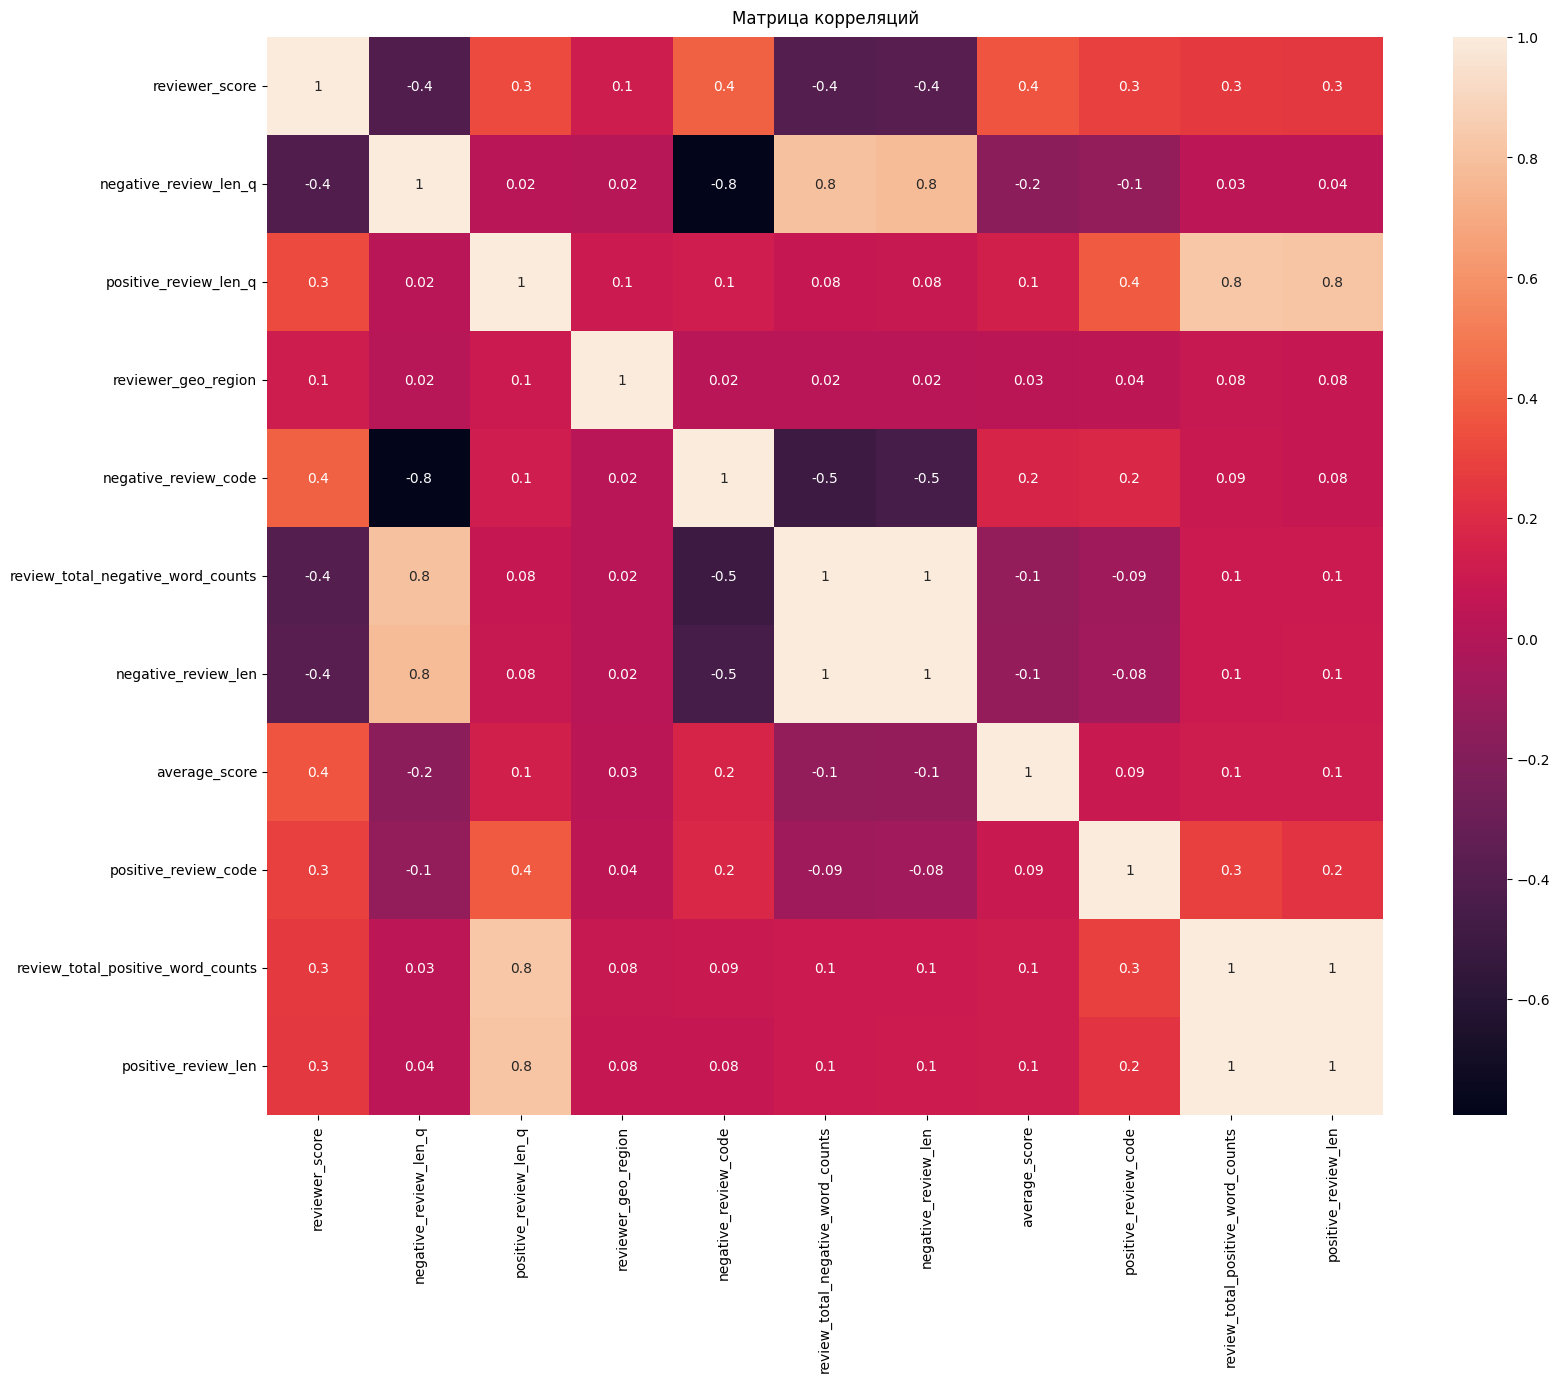

In [990]:
plt.figure(figsize=(18, 14))
sns.heatmap(df_new.corr(), annot=True, fmt='.1g')
plt.title('Матрица корреляций', pad=10);

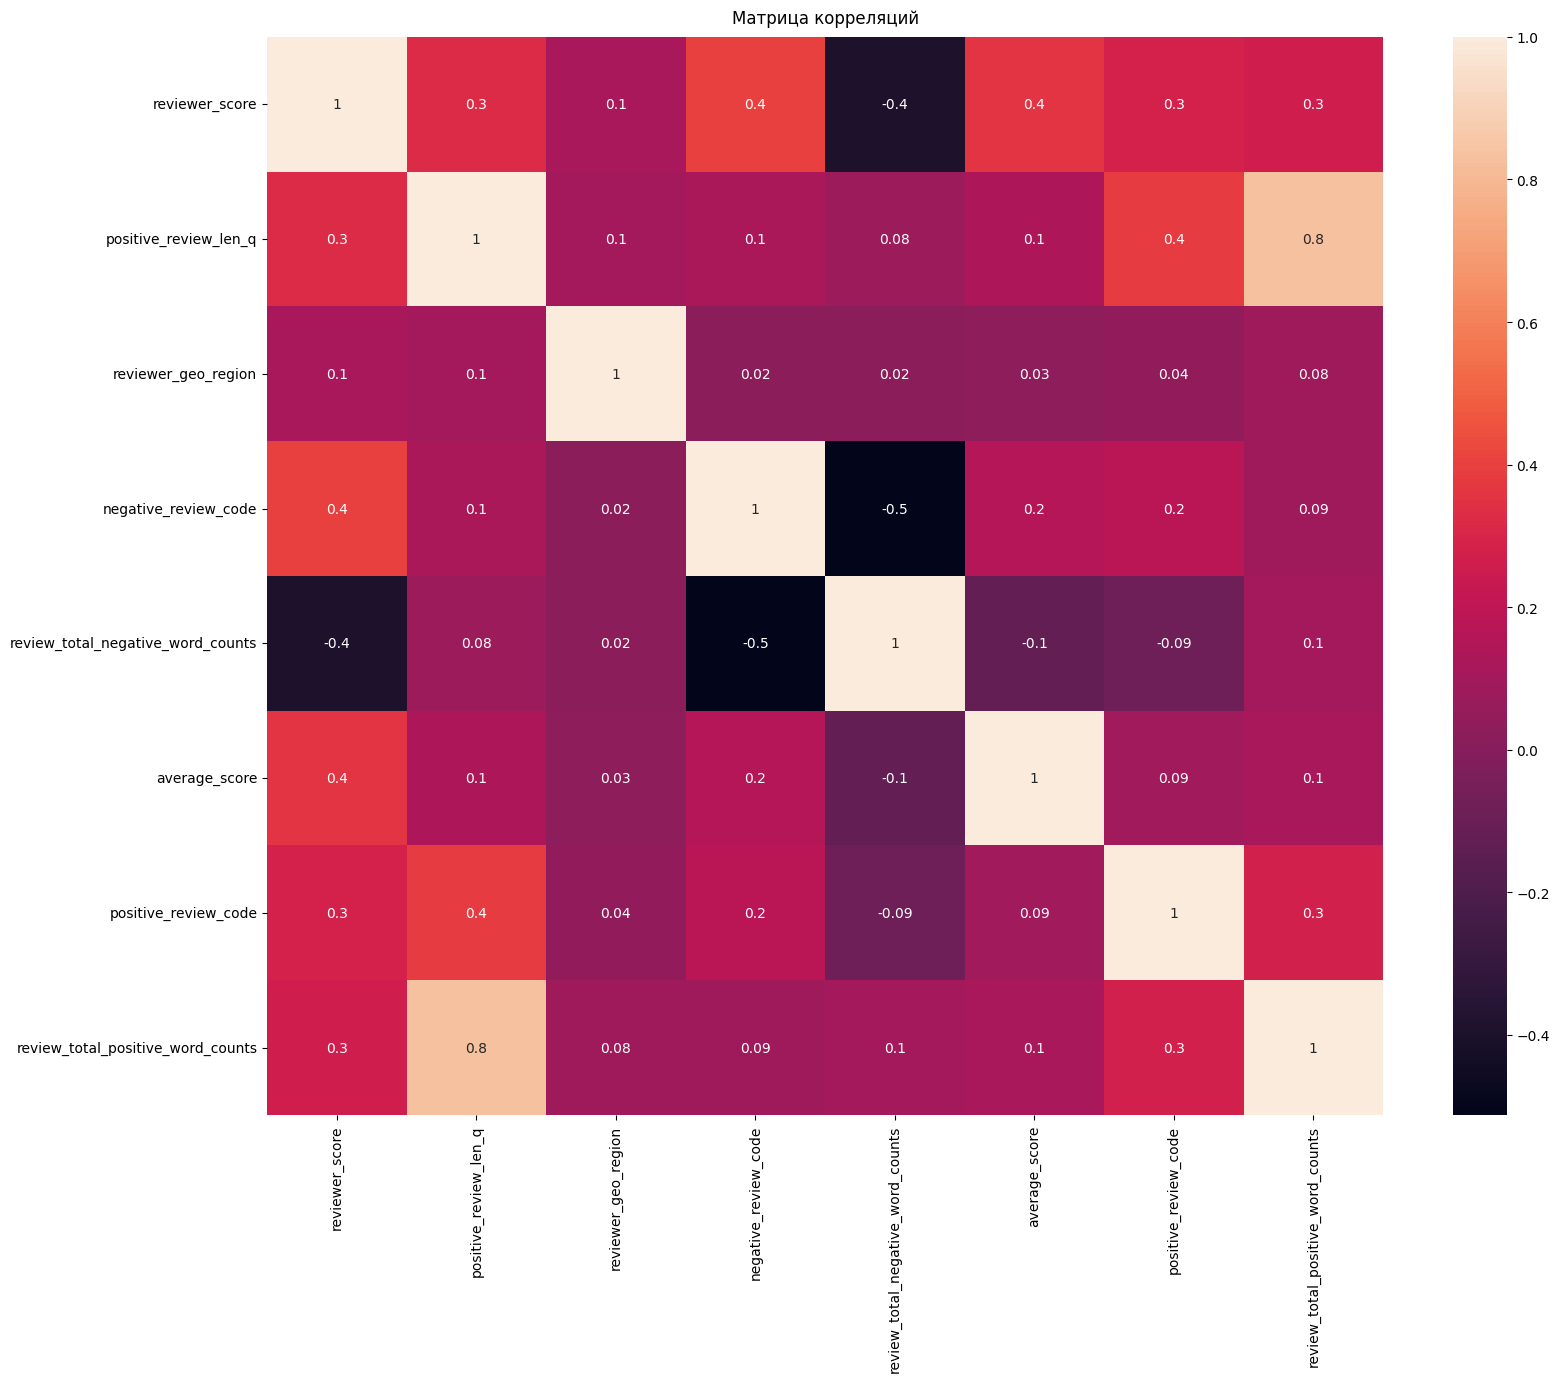

In [991]:
df_new.drop(['negative_review_len_q', 'positive_review_len', 'negative_review_len'], axis=1, inplace=True)
plt.figure(figsize=(18, 14))
sns.heatmap(df_new.corr(), annot=True, fmt='.1g')
plt.title('Матрица корреляций', pad=10);

Мы избавились от мультиколлинеарности между факторами, посмотрим на сколько улучшился результат.

In [992]:

    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = df_new.drop('reviewer_score', axis=1)
y = df_new['reviewer_score']  
      
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13985906162110964


В итоге